<a href="https://colab.research.google.com/github/pragmatizt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS6_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas
- work with dataframe filtering, list comprehensions, and .apply function

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-07-11 22:18:09--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.3’

LoanStats_2018Q4.cs     [                <=> ]  21.51M   810KB/s    in 28s     

2019-07-11 22:18:37 (794 KB/s) - ‘LoanStats_2018Q4.csv.zip.3’ saved [22559146]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4543.48","4543.48","1511.13","1511.13","1056.52","454.61","0.0","0.0","0.0","Jun-2019","190.21","Jul-2019","Jun-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [5]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('LoanStats_2018Q4.csv')
df.head(20)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                 emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       5000      5000        5000             36 months  17.97%  180.69      D     D1        Administrative            6 years    MORTGAGE       59280      Source Verified     Dec-2018 Current     n          NaN NaN  debt_consolidation Debt consolidation      490xx    MI         10.51 0           Apr-2011         0              NaN                    NaN                    8        0       4599      19.1%      13        w                   4456.17   4456.17       895.96           895.96          543.83          352.13        0.0                0.0        0.0                     Jun-2019     180.69          Jul-2019     Jun-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            110299      0           1           0           2           14                 7150         72      0           2           0          35       24100            1      5           0            4                    18383       13800          0       0                        0           87                 92                   15                    14             2        77                   NaN                      14                    NaN                            0                     0              3               3           3         4         6             7             3                   8        0                0            0                  0                  100         

In [6]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,110299.0,0.0,1.0,0.0,2.0,14.0,7150.0,72.0,0.0,2.0,0.0,35.0,24100.0,1.0,5.0,0.0,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,NaN,14.0,NaN,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000.0,25000.0,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1.0,Jan-1997,0.0,7.0,NaN,23.0,0.0,39053.0,45.7%,49.0,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0.0,7.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,95648.0,0.0,3.0,0.0,0.0,35.0,54716.0,23.0,1.0,2.0,8422.0,39.0,85500.0,0.0,1.0,0.0,2.0,4159.0,34837.0,44.5,0.0,0.0,263.0,246.0,10.0,10.0,0.0,48.0,NaN,NaN,NaN,0.0,9.0,13.0,10.0,14.0,21.0,19.0,27.0,13.0,23.0,0.0,0.0,1.0,1.0,98.0,10.0,0.0,0.0,179321.0,95648.0,62800.0,91424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolida

In [7]:
df.shape

(128414, 144)

In [8]:
df.isnull().sum()

id                                            128412
member_id                                     128414
loan_amnt                                          2
funded_amnt                                        2
funded_amnt_inv                                    2
term                                               2
int_rate                                           2
installment                                        2
grade                                              2
sub_grade                                          2
emp_title                                      20949
emp_length                                     11706
home_ownership                                     2
annual_inc                                         2
verification_status                                2
issue_d                                            2
loan_status                                        2
pymnt_plan                                         2
url                                           

In [9]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128409,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1.0,Jun-2006,0.0,21.0,NaN,9.0,0.0,2597.0,27.3%,15.0,f,4056.68,4056.68,1354.87,1354.87,943.32,411.55,0.0,0.0,0.0,Jun-2019,169.83,Jul-2019,Jun-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,1413.0,69785.0,0.0,2.0,0.0,1.0,16.0,2379.0,40.0,3.0,4.0,1826.0,32.0,9500.0,0.0,0.0,1.0,5.0,8723.0,1174.0,60.9,0.0,0.0,147.0,85.0,9.0,9.0,2.0,10.0,21.0,9.0,21.0,0.0,1.0,3.0,2.0,2.0,6.0,6.0,7.0,3.0,9.0,0.0,0.0,0.0,3.0,92.9,50.0,0.0,0.0,93908.0,4976.0,3000.0,6028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000.0,10000.0,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0.0,Oct-2008,2.0,40.0,NaN,15.0,0.0,6269.0,13.1%,25.0,f,8053.98,7852.63,2606.08,2540.93,1946.02,660.06,0.0,0.0,0.0,Jun-2019,327.68,Jul-2019,Jun-2019,0.0,53.0,1.0,Individual,NaN,NaN,NaN,0.0,520.0,16440.0,3.0,1.0,1.0,1.0,2.0,10171.0,100.0,2.0,5.0,404.0,28.0,47700.0,0.0,3.0,5.0,6.0,1265.0,20037.0,2.3,0.0,0.0,61.0,119.0,1.0,1.0,0.0,1.0,NaN,1.0,40.0,1.0,2.0,4.0,6.0,8.0,3.0,14.0,22.0,4.0,15.0,0.0,0.0,0.0,3.0,92.0,0.0,0.0,0.0,57871.0,16440.0,20500.0,10171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000.0,10000.0,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1

In [10]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0

In [11]:
print(df.shape)
df.isnull().sum().sort_values(ascending=False)

(128412, 144)


id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

In [0]:
df = df.drop(['id','url','desc','member_id'], axis='columns')

In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [14]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [15]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0

In [16]:
'17.97%'.strip('%')

'17.97'

In [17]:
'17.97%'[:-1]

'17.97'

In [18]:
type('17.97%'.strip('%'))

str

In [19]:
float('17.97%'.strip('%'))

17.97

In [20]:
int(float('17.97%'.strip('%')) // 1)

17

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
  return float(string.strip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)

In [23]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,14.47,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,10000,10000.0,36 months,10.33,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,27

In [24]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

## List Comprehension Example

In [25]:
example_list = ['13.56%','13.57%','13.58%']
[remove_percent(string) for string in example_list]

[13.56, 13.57, 13.58]

### Clean `emp_title`

Look at top 20 titles

In [26]:
df['emp_title']

0                                   Administrative
1                                          teacher
2                                              NaN
3                                         Security
4                             Construction Manager
5                        Administrative Assistant 
6                                              NaN
7                           Quality Field Engineer
8                                       Consultant
9                                   Vice President
10                                             Cna
11                               Financial Advisor
12                                           Sever
13                                      bus driver
14                                      Controller
15                        Manager, Patient Finance
16                                         Printer
17                                         Dealer 
18                                 Sr. CAE Analyst
19                             

In [27]:
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head(20)

(43893,)


NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [28]:
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [0]:
import numpy as np
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [30]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"
  return title.strip()

[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
# df = df.apply(lambda x: x.strip().title() if isinstance(x, str))

In [32]:
df['emp_title'] = df['emp_title'].apply(clean_title)
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head(20)

(34902,)


Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
# [{"Nurse": ['Registered Nurse', 'Rn', 'Nurse']}, {'Manager': ['Sales Manager', "General Manager"]}]

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [34]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,25000,25000,25000.0,60 months,14.47,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7

## Dataframe Filtering

In [0]:
managers = df[df['emp_title_manager'] == True]
plebians = df[df['emp_title_manager'] == False]

In [36]:
print(managers['int_rate'].mean())
print(plebians['int_rate'].mean())

12.760582149647126
12.957349045509492


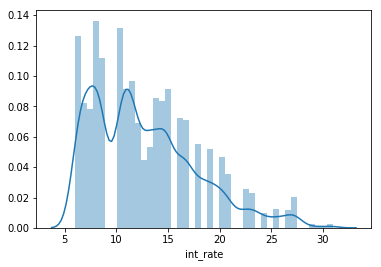

In [37]:
import seaborn as sns
sns.distplot(managers['int_rate'])

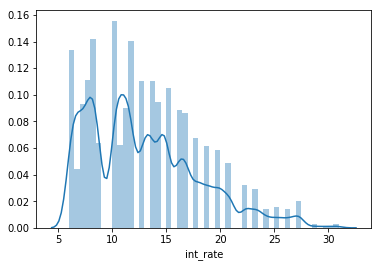

In [38]:
sns.distplot(plebians['int_rate'])

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [39]:
df['issue_d'].head().values

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [40]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [42]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [43]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [44]:
df['issue_d'].describe()

count                  128412
unique                      3
top       2018-10-01 00:00:00
freq                    46305
first     2018-10-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

In [45]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
5         2018
6         2018
7         2018
8         2018
9         2018
10        2018
11        2018
12        2018
13        2018
14        2018
15        2018
16        2018
17        2018
18        2018
19        2018
20        2018
21        2018
22        2018
23        2018
24        2018
25        2018
26        2018
27        2018
28        2018
29        2018
30        2018
31        2018
32        2018
33        2018
34        2018
35        2018
36        2018
37        2018
38        2018
39        2018
40        2018
41        2018
42        2018
43        2018
44        2018
45        2018
46        2018
47        2018
48        2018
49        2018
50        2018
51        2018
52        2018
53        2018
54        2018
55        2018
56        2018
57        2018
58        2018
59        2018
60        2018
61        2018
62        2018
63        2018
64        2018
65        2018
66        

In [0]:
df['issue_year'] = df['issue_d'].dt.year

In [47]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [49]:
df['issue_month'].value_counts()

10    46305
11    41973
12    40134
Name: issue_month, dtype: int64

In [50]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [51]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [52]:
df['earliest_cr_line'].head()

0    Apr-2011
1    Jan-1997
2    Jan-1996
3    Sep-2006
4    Jul-1997
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], 
                                        infer_datetime_format=True)

In [54]:
(df['issue_d'] - df['earliest_cr_line']).dt.days

0          2801
1          8004
2          8370
3          4474
4          7823
5          4079
6          6088
7          3713
8          5479
9          7093
10         6331
11         6635
12         1705
13        14428
14         3562
15         6453
16         4232
17         1736
18         5479
19         9192
20         4079
21         3743
22        11048
23         2648
24         4901
25         1979
26        10380
27         1764
28         5174
29         8339
30         5723
31         4201
32         5693
33         2983
34         4901
35         4079
36         5935
37         3075
38         4962
39         5782
40         5174
41         5023
42         4686
43         2435
44         1522
45         2679
46         3987
47         4201
48         4383
49         4474
50         4444
51         9953
52         5143
53         8645
54         3013
55         7001
56         5479
57         4321
58         4748
59         5782
60         2526
61         1522
62      

In [55]:
df['days_from_earliest_credit_to_issue'] = (
    df['issue_d'] - df['earliest_cr_line']).dt.days

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue
0,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2801
1,25000,25000,25000.0,60 months,14.47,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,1997-01-01,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8004
2,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.0,May-2019,324.23,Jul-2019,Jun-201

In [56]:
df['years_from_earliest_credit_to_issue'] = (df['days_from_earliest_credit_to_issue'] / 365)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,years_from_earliest_credit_to_issue
0,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2801,7.673973
1,25000,25000,25000.0,60 months,14.47,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,1997-01-01,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8004,21.928767
2,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211

In [57]:
type(np.NaN)

float

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [58]:
# Question 2 / Bullet point 2 - convert term column from string to integer
df['term'].head().values

array([' 36 months', ' 60 months', ' 36 months', ' 36 months',
       ' 36 months'], dtype=object)

In [82]:
df['term'].describe()

count    128412.000000
mean         43.519484
std          11.132203
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64

In [60]:
' 36 months'.strip(' months')

'36'

In [0]:
# This didn't work for me.  I originally wanted to strip the ' months' part of the column, then convert the string into a float.

def remove_month(string):
    return float(string.strip(' months'))

In [0]:
df['term'] = df['term'].apply(remove_month)

In [81]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,years_from_earliest_credit_to_issue
0,5000,5000,5000.0,36,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2801,7.673973
1,25000,25000,25000.0,60,14.47,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,1997-01-01,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8004,21.928767
2,10000,10000,10000.0,36,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.

In [84]:
# Define it as a float.
# Stuck here.  Will revisit.
df['term'].describe()

count    128412.000000
mean         43.519484
std          11.132203
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64

In [120]:
# Question 3 - - Make a column named `loan_status_is_great`. 
# It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
df['term'].dtype

dtype('int64')

In [122]:
# Make a copy so that I can refer back to the original if I miss things up.
df1 = df.copy()
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,years_from_earliest_credit_to_issue
0,5000,5000,5000.0,36,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2801,7.673973
1,25000,25000,25000.0,60,14.47,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,1997-01-01,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8004,21.928767
2,10000,10000,10000.0,36,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,1211.41,401.13,0.0,0.0,0.

In [0]:
df1["loan_status_is_great"]= df['loan_status']

In [0]:
def status_fixed(string):
  if string == "Current" or string == "Fully Paid":
    return 1
  else:
    return 0

In [119]:
df1.head(200)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,years_from_earliest_credit_to_issue,loan_status_is_great
0,5000,5000,5000.0,36,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.960000,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2801,7.673973,0
1,25000,25000,25000.0,60,14.47,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,1997-01-01,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.950000,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8004,21.928767,0
2,10000,10000,10000.0,36,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.540

In [117]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,years_from_earliest_credit_to_issue,loan_status_is_great
0,5000,5000,5000.0,36,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,NaN,14.0,NaN,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2801,7.673973,0
1,25000,25000,25000.0,60,14.47,587.82,C,C2,Teacher,10+ years,OWN,110000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,117xx,NY,26.43,1,1997-01-01,0,7.0,NaN,23,0,39053,45.7%,49,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,0,7.0,1,Individual,NaN,NaN,NaN,0,0,95648,0,3,0,0,35.0,54716,23.0,1,2,8422,39.0,85500,0,1,0,2,4159.0,34837.0,44.5,0,0,263.0,246,10,10,0,48.0,NaN,NaN,NaN,0,9,13,10,14,21,19,27,13,23,0.0,0,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8004,21.928767,0
2,10000,10000,10000.0,36,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8788.59,8788.59,1612.54,1612.54,

In [140]:
df1['loan_status_is_great'] = df1['loan_status'].apply(status_fixed)
print(df1['loan_status_is_great'].value_counts(dropna=False))

1    124299
0      4113
Name: loan_status_is_great, dtype: int64


In [141]:
# Question 4: - Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.
df1['last_pymnt_d'].tail()

128407    Dec-2018
128408    Jun-2019
128409    Jun-2019
128410    Jun-2019
128411    Jun-2019
Name: last_pymnt_d, dtype: object

In [0]:
df1['last_pymnt_d_month'] = pd.to_datetime(df1['last_pymnt_d'], infer_datetime_format=True).dt.month
df1['last_pymnt_d_year'] = pd.to_datetime(df1['last_pymnt_d'], infer_datetime_format=True).dt.year

In [143]:
df1.isnull().sum()

loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                          0
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
purpose                                            0
title                                              0
zip_code                                      

In [0]:
# Will have some NaN values -- ffill or drop entirely.
# NOTE TO SELF:  Next time, also look into using lambda function to add integer to them.  

df1['last_pymnt_d_month'].fillna(method='ffill', inplace=True)
df1['last_pymnt_d_year'].fillna(method='ffill', inplace=True)


In [139]:
df1.isnull().sum()

loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                          0
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
purpose                                            0
title                                              0
zip_code                                      

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01